In [861]:
# Import data science essentials
import pandas as pd
import numpy as np
from datetime import datetime,timedelta

# Import plotting essentials
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

import copy
from numpy import matlib


In [862]:
btc_file = 'coin_Bitcoin.csv'
eth_file = 'coin_Ethereum.csv'

In [863]:
btc_df = pd.read_csv(btc_file,index_col='Date',parse_dates=True)
eth_df = pd.read_csv(eth_file,index_col='Date',parse_dates=True)

In [864]:
last_date = btc_df.index.max()
year = last_date - timedelta(days=359)

end_date = f"{last_date.year}-{last_date.month}-{last_date.day}"
start_date = f"{year.year}-{year.month}-{year.day}"

In [865]:
a = btc_df[start_date:end_date]
b = eth_df[start_date:end_date]

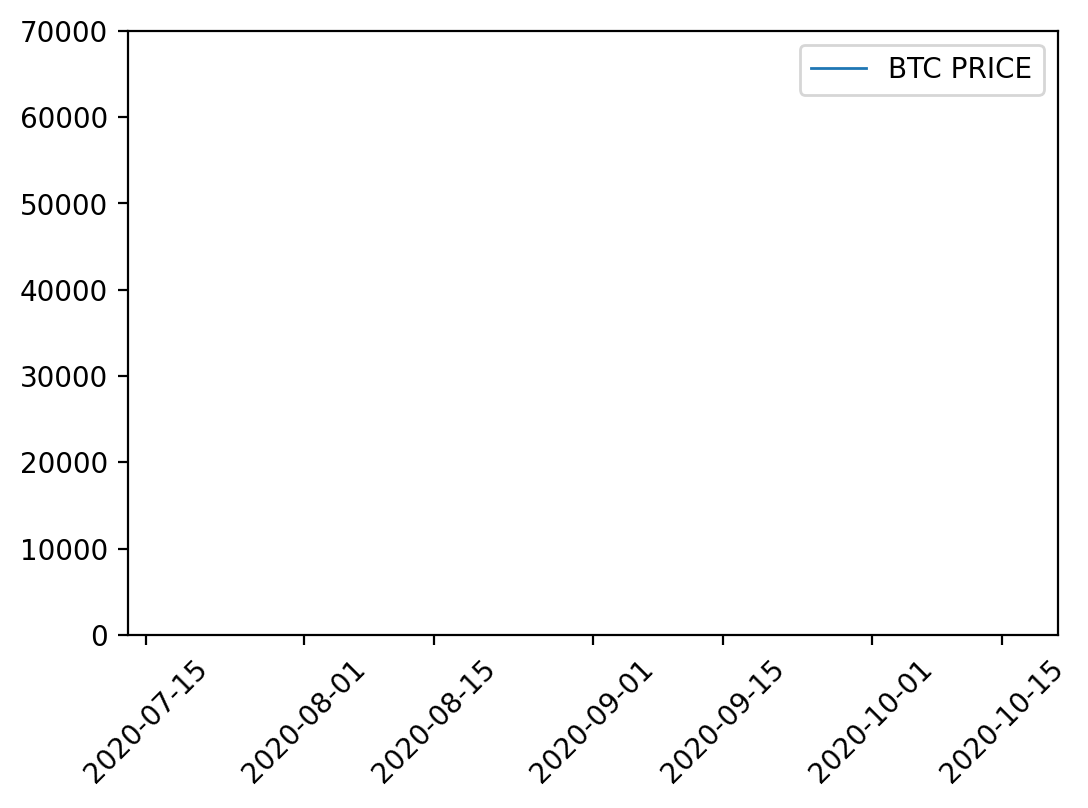

In [866]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(dpi=200)

# Set up x-axis moving window
moving_window = 100
x_last = a.index.min()+timedelta(days=moving_window)
x_first = a.index.min()

# Update plot with starting background axis and labels
ax = plt.axes(xlim=(x_first,x_last),ylim=(0,70000))
line, = ax.plot([], [], lw=1,label='BTC PRICE')
line.axes.tick_params(axis='x', labelrotation = 45)
plt.legend()

In [867]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

In [868]:
moving_window = 100
x_last = a.index.min()+timedelta(days=moving_window)
x_first = a.index.min()
dt = timedelta(days=1)

def animate(i):
    global x_last
    global x_first
    global dt
    
    x = a.index[:i]
    y = a['Close'][:i]
    line.set_data(x, y)
    
    if a.index[i] >= x_last-dt:
        x_last += dt 
        x_first += dt
        line.axes.set_xlim(x_first,x_last)
        
    return line,

In [869]:
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(a.index), interval=100, blit=False)

In [870]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [871]:
anim

In [872]:
log_close_btc = a['Close']

In [873]:
#log_close_btc = np.log(log_close_btc)

In [874]:
log_close_btc

Date
2020-07-12 23:59:59     9276.499850
2020-07-13 23:59:59     9243.613855
2020-07-14 23:59:59     9243.213416
2020-07-15 23:59:59     9192.837368
2020-07-16 23:59:59     9132.227863
                           ...     
2021-07-02 23:59:59    33897.048590
2021-07-03 23:59:59    34668.548402
2021-07-04 23:59:59    35287.779766
2021-07-05 23:59:59    33746.002456
2021-07-06 23:59:59    34235.193451
Name: Close, Length: 360, dtype: float64

In [875]:
log_close_eth = b['Close']
#log_close_eth = np.log(log_close_eth)
log_close_eth

Date
2020-07-12 23:59:59     242.131695
2020-07-13 23:59:59     239.604585
2020-07-14 23:59:59     240.211494
2020-07-15 23:59:59     238.423527
2020-07-16 23:59:59     233.640883
                          ...     
2021-07-02 23:59:59    2150.040364
2021-07-03 23:59:59    2226.114282
2021-07-04 23:59:59    2321.724112
2021-07-05 23:59:59    2198.582464
2021-07-06 23:59:59    2324.679449
Name: Close, Length: 360, dtype: float64

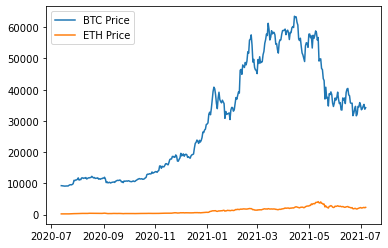

In [876]:
plt.plot(log_close_btc.index,log_close_btc, label="BTC Price")
plt.plot(log_close_eth.index,log_close_eth, label="ETH Price")
plt.legend()
plt.show()

In [877]:
spread_btc = log_close_btc
spread_eth = log_close_eth
# for i in range(1,len(log_close_btc)): 
#     spread_btc.append(log_close_btc[i]-log_close_btc[i-1])
#     spread_eth.append(log_close_eth[i]-log_close_eth[i-1])

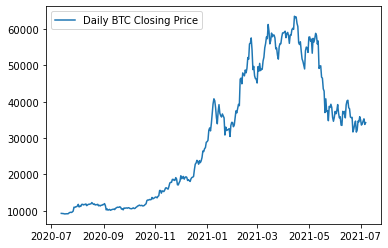

In [878]:
plt.plot(log_close_btc.index[:],spread_btc, label='Daily BTC Closing Price')
plt.legend()
plt.show()

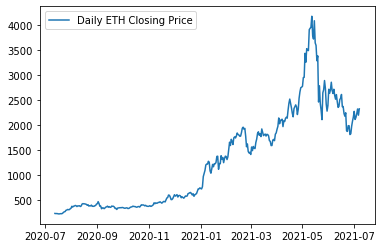

In [879]:
plt.plot(log_close_eth.index[:],spread_eth, label='Daily ETH Closing Price')
plt.legend()

In [880]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

def cointegration_test(Y, X):
    # Step 1: regress on variable on the other 
    ols_result = sm.OLS(Y, X).fit() 
    # Step 2: obtain the residual (ols_resuld.resid)
    # Step 3: apply Augmented Dickey-Fuller test to see whether 
    #        the residual is unit root    
    return ts.adfuller(ols_result.resid)

In [881]:
cointegration_test(spread_btc,spread_eth)

(-1.4232607015479724,
 0.5710752511894234,
 14,
 345,
 {'1%': -3.4494474563375737,
  '5%': -2.8699542285903887,
  '10%': -2.5712527305187987},
 6028.6262229551085)

In [882]:
ols_result=sm.OLS(spread_btc, spread_eth).fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              3018.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                   8.16e-177
Time:                        16:33:28   Log-Likelihood:                         -3875.4
No. Observations:                 360   AIC:                                      7753.
Df Residuals:                     359   BIC:                                      7757.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         20.6809      0.376     54.938      0.000      19.941      21.421
==============================================================================
Omnibus:                       54.634   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.640
Skew:                          -1.018   Prob(JB):                     2.28e-17
Kurtosis:                       3.982   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

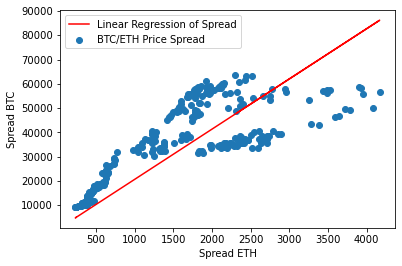

Close    20.680907
dtype: float64


In [883]:
plt.scatter(spread_eth,spread_btc,label='BTC/ETH Price Spread')
plt.plot(spread_eth, ols_result.predict(),label='Linear Regression of Spread',c="red")
plt.legend()
plt.xlabel('Spread ETH')
plt.ylabel('Spread BTC')
plt.show()

print(ols_result.params)

In [884]:
lookback=20
hedgeRatio=np.empty(len(spread_btc))
hedgeRatio[:]=np.nan

for t in range(lookback,len(hedgeRatio),1):
    
    regression_result=sm.OLS(spread_btc[t-lookback+1:t],spread_eth[t-lookback+1:t]).fit()
    hedgeRatio[t]=regression_result.params[0]

In [885]:
# Testing how sm.OLS module works
# lookback=20
# t=lookback
# regression_result=sm.OLS(spread_btc[t-lookback:t],spread_eth[t-lookback:t]).fit()
# regression_result.params

In [886]:
# y2 = [independent_spread dependent_spread]
y2 = np.array([spread_eth, spread_btc]).transpose()

# introducing massive amounts of look-ahead bias :)
hedgeRatio[0:20]=0.38
hedgeRatio

array([ 0.38      ,  0.38      ,  0.38      ,  0.38      ,  0.38      ,
        0.38      ,  0.38      ,  0.38      ,  0.38      ,  0.38      ,
        0.38      ,  0.38      ,  0.38      ,  0.38      ,  0.38      ,
        0.38      ,  0.38      ,  0.38      ,  0.38      ,  0.38      ,
       35.48587696, 34.89546001, 34.33952648, 33.74626438, 33.16690527,
       32.66532828, 32.27569677, 31.99109831, 31.66762186, 31.37514828,
       31.1428213 , 30.9608638 , 30.78218438, 30.51471595, 30.20921076,
       29.87354842, 29.55482964, 29.3100474 , 29.10738748, 28.95636908,
       28.85742485, 28.8603154 , 28.88081655, 28.93258386, 28.91181602,
       28.89870811, 28.86147047, 28.84750715, 28.81396881, 28.75246862,
       28.61410482, 28.46187946, 28.2816256 , 28.22315978, 28.19568093,
       28.1887132 , 28.24596176, 28.27719029, 28.28794206, 28.3405064 ,
       28.30048223, 28.22832525, 28.12214575, 28.0200366 , 27.94900796,
       27.87411246, 27.8660876 , 27.89566985, 27.85921119, 27.92

In [887]:
yport = np.sum(np.multiply(np.array([-hedgeRatio, np.ones(len(spread_btc))]).transpose(),y2),axis=1)

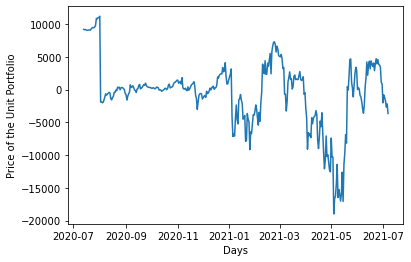

In [888]:
plt.plot(log_close_btc.index,yport)
plt.xlabel('Days')
plt.ylabel('Price of the Unit Portfolio')
plt.show()

In [889]:
# l = log_close_btc.reset_index().index.to_numpy()
# # l = [range(len(log_close_btc))]
# cointegration_test(yport,l)

In [890]:
yport_df = pd.DataFrame(yport,index=log_close_btc.index,columns=['Spread'])

yport_df

,Spread
Date,
2020-07-12 23:59:59,9184.489806
2020-07-13 23:59:59,9152.564113
2020-07-14 23:59:59,9151.933049
2020-07-15 23:59:59,9102.236428
2020-07-16 23:59:59,9043.444327
...,...
2021-07-02 23:59:59,-1221.780226
2021-07-03 23:59:59,-1745.315632
2021-07-04 23:59:59,-2673.996468


In [891]:
# # Bollinger band strategy was a total failure! Using Linear Mean Reversion Instead
# entryZscore=-1
# exitZscore=1

# # Calculates zScore for every day in the spread
# zScore=(yport_df-yport_df.rolling(window=lookback).mean())/yport_df.rolling(window=lookback).std()

# # Sets longsEntry array to zScore value if below entry threshold
# longsEntry=zScore < entryZscore

# # Sets longsExit array to zScore value if above exit threshold
# longsExit=zScore >= exitZscore

# # Set shortsEntry array to zScore value if above entry threshold
# shortsEntry=zScore > -entryZscore

# # Set shortsEntry array to zScore value if below exit threshold
# shortsExit=zScore <= -exitZscore

# # Setting Up simulated long trades
# numUnitsLong=np.empty(len(yport_df))
# numUnitsLong[:]=np.nan

# # Setting up simulated short trades
# numUnitsShort=np.empty(len(yport_df))
# numUnitsShort[:]=np.nan

# # Convert np long arrays to dfs
# numUnitsLong[0]=0
# numUnitsLong = pd.DataFrame(numUnitsLong)
# # Convert np short arrays to dfs
# numUnitsShort[0]=0
# numUnitsShort = pd.DataFrame(numUnitsShort)

# numUnitsLong[0].iloc[longsEntry.reset_index().loc[longsEntry.reset_index()['Spread']==True].index]=1
# numUnitsLong[0].iloc[longsExit.reset_index().loc[longsExit.reset_index()['Spread']==True].index]=0

# numUnitsLong.fillna(method='ffill',inplace=True)


# numUnitsShort[0].iloc[shortsEntry.reset_index().loc[shortsEntry.reset_index()['Spread']==True].index]=-1
# numUnitsShort[0].iloc[shortsExit.reset_index().loc[shortsExit.reset_index()['Spread']==True].index]=0

# numUnitsShort.fillna(method='ffill',inplace=True)

# numUnits= numUnitsLong + numUnitsShort
# numUnits.fillna(0)
# numUnits



In [892]:
zScore=-(yport_df-yport_df.rolling(window=lookback).mean())/yport_df.rolling(window=lookback).std()

zScore.fillna(method='bfill',inplace=True)

In [893]:
import copy
y3 = copy.deepcopy(y2)
y3


array([[  242.13169523,  9276.49985018],
       [  239.60458484,  9243.61385509],
       [  240.21149418,  9243.21341642],
       [  238.42352695,  9192.83736784],
       [  233.64088301,  9132.22786293],
       [  232.77308561,  9151.39223963],
       [  235.48380522,  9159.03990531],
       [  238.48752372,  9185.81691242],
       [  236.15316771,  9164.2313647 ],
       [  245.01672849,  9374.88752808],
       [  262.19065629,  9525.36344997],
       [  274.68904905,  9581.07201141],
       [  279.21540948,  9536.89268563],
       [  304.0567612 ,  9677.11349729],
       [  309.64360929,  9905.16724705],
       [  321.51408818, 10990.8733998 ],
       [  316.65725234, 10912.8230505 ],
       [  318.19088442, 11100.4681253 ],
       [  334.58662928, 11111.2142899 ],
       [  345.55464931, 11323.4664207 ],
       [  385.19971932, 11759.5927707 ],
       [  370.67171149, 11053.613901  ],
       [  386.29517344, 11246.3487749 ],
       [  389.87548514, 11205.8929179 ],
       [  401.59

In [894]:
#positions = np.multiply(matlib.repmat(numUnits,1,2),np.array([hedgeRatio, -np.ones(hedgeRatio.size)]).transpose(),y2)

In [895]:
#numUnits

In [896]:
# Positions array for Linear Mean Reversion Strategy
positions = positions = np.multiply(matlib.repmat(zScore,1,2),np.array([hedgeRatio, -np.ones(hedgeRatio.size)]).transpose(),y2)

In [897]:
zScore.head(10)

,Spread
Date,
2020-07-12 23:59:59,-1.920969
2020-07-13 23:59:59,-1.920969
2020-07-14 23:59:59,-1.920969
2020-07-15 23:59:59,-1.920969
2020-07-16 23:59:59,-1.920969
2020-07-17 23:59:59,-1.920969
2020-07-18 23:59:59,-1.920969
2020-07-19 23:59:59,-1.920969
2020-07-20 23:59:59,-1.920969


In [898]:
pnl_arr = []
    
for i in range(y3.shape[0]-1):
        
    independent_return = positions[i+1,0]*(y3[i,0]-y3[i+1,0])/y3[i+1,0]
    dependent_return = positions[i+1,1]*(y3[i,1]-y3[i+1,1])/y3[i+1,1]
    daily_pnl = independent_return+dependent_return
        
    pnl_arr.append(daily_pnl)


In [899]:
ret_arr = []
    
for i in range(y3.shape[0]-1):
    
    if (abs(positions[i+1,0])+abs(positions[i+1,1])) == 0:
        ret = 0
    else:
        ret = pnl_arr[i]/(abs(positions[i+1,0])+abs(positions[i+1,1]))
        
    ret_arr.append(ret)

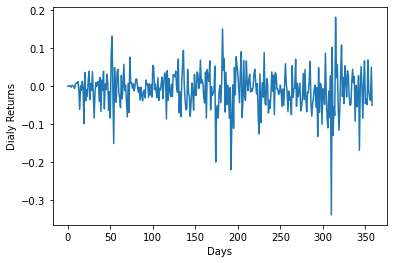

In [900]:
plt.plot(np.arange(len(ret_arr)),ret_arr)
plt.xlabel('Days')
plt.ylabel('Dialy Returns')
plt.show()

In [901]:
c = [1]*len(ret_arr)
c = np.array(c)
ret_arr = np.array(ret_arr)
ret_arr1 = ret_arr+c
cumulative_ret = ret_arr1.cumprod()

In [902]:
array1 = cumulative_ret

nan_array = np.isnan(array1)
not_nan_array = ~ nan_array
array2 = array1[not_nan_array]

Text(0, 0.5, 'Cumulative Returns')

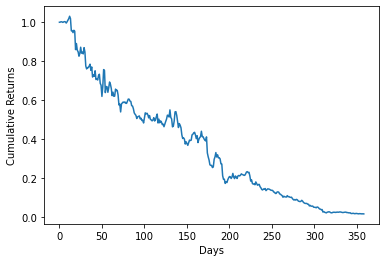

In [903]:
stop=100
plt.plot(np.arange(len(array2)),array2)
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')

In [904]:
ret_arr1

array([0.9996738 , 1.00072711, 1.00190598, 0.99917265, 0.99745593,
       1.00256471, 1.00135581, 0.99898489, 0.99367853, 1.00658931,
       1.00831566, 1.00782076, 1.01199707, 0.98828446, 0.93858499,
       1.00095927, 0.98907775, 1.01279275, 0.99515716, 0.90091649,
       1.03632255, 0.96118503, 0.99097717, 0.97303029, 1.01636702,
       1.03902251, 0.9647685 , 1.00690034, 0.9888566 , 1.03821459,
       0.97411158, 0.91532706, 0.9807969 , 1.00929188, 0.9991109 ,
       1.01054847, 1.01265555, 0.95973419, 1.0228183 , 0.93298514,
       1.01612475, 0.98905774, 1.03937995, 0.9404307 , 1.00580933,
       0.99080465, 1.03169339, 1.00988346, 0.93635414, 0.98506729,
       0.91582522, 1.0795718 , 1.13224351, 0.99447751, 0.84853732,
       1.0491083 , 0.99781985, 0.95768405, 1.03679197, 1.0441876 ,
       0.98312889, 0.96899091, 0.94331086, 1.02878334, 0.96673859,
       1.00200616, 1.05767238, 0.98832351, 1.00248774, 0.96278053,
       0.91883491, 1.00737729, 0.93056292, 1.07656153, 1.00797

In [905]:
ret_arr

array([-3.26204640e-04,  7.27113171e-04,  1.90598355e-03, -8.27350729e-04,
       -2.54407270e-03,  2.56471030e-03,  1.35580510e-03, -1.01511461e-03,
       -6.32147485e-03,  6.58930665e-03,  8.31566483e-03,  7.82075701e-03,
        1.19970660e-02, -1.17155351e-02, -6.14150051e-02,  9.59269725e-04,
       -1.09222508e-02,  1.27927463e-02, -4.84284154e-03, -9.90835060e-02,
        3.63225521e-02, -3.88149711e-02, -9.02282733e-03, -2.69697084e-02,
        1.63670169e-02,  3.90225086e-02, -3.52314968e-02,  6.90033589e-03,
       -1.11433987e-02,  3.82145947e-02, -2.58884161e-02, -8.46729403e-02,
       -1.92030998e-02,  9.29187720e-03, -8.89096445e-04,  1.05484700e-02,
        1.26555521e-02, -4.02658057e-02,  2.28183001e-02, -6.70148560e-02,
        1.61247475e-02, -1.09422607e-02,  3.93799533e-02, -5.95692991e-02,
        5.80933497e-03, -9.19534664e-03,  3.16933932e-02,  9.88346496e-03,
       -6.36458594e-02, -1.49327076e-02, -8.41747754e-02,  7.95717956e-02,
        1.32243507e-01, -

In [906]:
array2

array([0.9996738 , 1.00040067, 1.00230742, 1.00147816, 0.99893033,
       1.00149229, 1.00285012, 1.00183211, 0.99549906, 1.00205871,
       1.01039149, 1.01829352, 1.03051005, 1.01843707, 0.95588976,
       0.95680671, 0.94635623, 0.95846272, 0.95382104, 0.85931311,
       0.89052555, 0.85595983, 0.84823665, 0.82535996, 0.83886864,
       0.8716034 , 0.8408955 , 0.84669796, 0.83726287, 0.86925853,
       0.84675481, 0.77505759, 0.76017408, 0.76723752, 0.76655538,
       0.77464136, 0.78444488, 0.75285857, 0.77003752, 0.71843357,
       0.73001813, 0.72203008, 0.75046359, 0.705759  , 0.70985899,
       0.70333159, 0.72562256, 0.73279422, 0.6861549 , 0.67590875,
       0.61901429, 0.66827036, 0.75664478, 0.75246622, 0.63849567,
       0.6698511 , 0.66839073, 0.64010714, 0.66365794, 0.69298339,
       0.681292  , 0.66016575, 0.62274152, 0.64066611, 0.61935665,
       0.62059918, 0.65639061, 0.64872628, 0.65034014, 0.62613482,
       0.57531454, 0.5795588 , 0.53931593, 0.58060678, 0.58523

In [907]:
np.arange(len(array2[:20]))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])